## RNA Classification Part 2

Here, we're trying to create a dataset from the images obtained during the previous step. We're using a library called as 'Multilabelpigeon' that helps us labeling the images in an easier way

## Step 2: Creating the Dataset using the images

In [2]:
#!pip install multi-label-pigeon

In [4]:
#!pip install pigeon-jupyter

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from fastai.vision import *

### Labeling the images, so that we avoid the false positives that are so certain.
#Unlike other cells, you can try executing this below **2 cells** alone to understand how the labeling is done. If there's an error, do try to install the libraries given in the first two cells

In [19]:
#Using multi label pigeon to label our data
from multi_label_pigeon import multi_label_annotate
from pigeon import annotate
from IPython.display import display, Image
images = []
path = 'train/'
for i in range(121,416):
    images.append(path + str('i')+str(i)+'.png')

annotations = annotate(images,
    options=['tRNA','miRNA','Neither'],
    display_fn=lambda filename: display(Image(filename))
    )

HTML(value='0 examples annotated, 296 examples left')

Output()

Annotation done.


In [2]:
from multi_label_pigeon import multi_label_annotate
from IPython.display import display, Image
images = []
path = 'miRNA/folds/'
for i in range(0,176):
    images.append(path + str(i)+'.png')

annotations2 = annotate(images,
    options=['tRNA','miRNA','Neither'],
    display_fn=lambda filename: display(Image(filename))
    )

HTML(value='0 examples annotated, 177 examples left')

Output()

In [15]:
one_to_118

[('train/i0.png', 'miRNA'),
 ('train/i1.png', 'Neither'),
 ('train/i2.png', 'miRNA'),
 ('train/i3.png', 'miRNA'),
 ('train/i4.png', 'miRNA'),
 ('train/i5.png', 'miRNA'),
 ('train/i6.png', 'miRNA'),
 ('train/i7.png', 'miRNA'),
 ('train/i8.png', 'miRNA'),
 ('train/i9.png', 'miRNA'),
 ('train/i10.png', 'miRNA'),
 ('train/i11.png', 'miRNA'),
 ('train/i12.png', 'miRNA'),
 ('train/i13.png', 'miRNA'),
 ('train/i14.png', 'Neither'),
 ('train/i15.png', 'miRNA'),
 ('train/i16.png', 'Neither'),
 ('train/i17.png', 'Neither'),
 ('train/i18.png', 'miRNA'),
 ('train/i19.png', 'miRNA'),
 ('train/i20.png', 'Neither'),
 ('train/i21.png', 'Neither'),
 ('train/i22.png', 'miRNA'),
 ('train/i23.png', 'miRNA'),
 ('train/i24.png', 'miRNA'),
 ('train/i25.png', 'Neither'),
 ('train/i26.png', 'miRNA'),
 ('train/i27.png', 'miRNA'),
 ('train/i28.png', 'miRNA'),
 ('train/i29.png', 'miRNA'),
 ('train/i30.png', 'Neither'),
 ('train/i31.png', 'Neither'),
 ('train/i32.png', 'miRNA'),
 ('train/i33.png', 'Neither'),
 ('t

In [18]:
o118and119 

[('train/i118.png', 'Neither'), ('train/i119.png', 'Neither')]

In [20]:
o121toend= annotations

### Creating a dataframe from the image name and the labels

In [22]:
names = []
labels = []
for i in one_to_118:
    names.append(i[0].split('/')[-1])
    labels.append(i[1])

In [23]:
data = list(zip(names,labels))
df = pd.DataFrame(data, columns=['img', 'type'])

In [24]:
df.head()

,img,type
0,i0.png,miRNA
1,i1.png,Neither
2,i2.png,miRNA
3,i3.png,miRNA
4,i4.png,miRNA


In [25]:
df2 = df

In [39]:
df2.tail()

,img,type
115,i115.png,Neither
116,i116.png,miRNA
117,i117.png,tRNA
118,i118.png,Neither
119,i119.png,Neither


In [38]:
df.loc[118+1] = [names[1]]+[labels[1]]

In [49]:
for i in range(0,295):
    df.loc[120+i] = [names[i]]+[labels[i]]

In [50]:
df.tail()

,img,type
410,i411.png,miRNA
411,i412.png,miRNA
412,i413.png,miRNA
413,i414.png,miRNA
414,i415.png,miRNA


In [40]:
names = []
labels = []
for i in o121toend:
    names.append(i[0].split('/')[-1])
    labels.append(i[1])

In [51]:
df['type'].value_counts()

miRNA      207
Neither    126
tRNA        82
Name: type, dtype: int64

In [52]:
a  = df.to_csv ('latest_labels.csv')

### Thus we have a dataset with images and labels, we can move on to building a model. 

# Step 3: Building the model

In [2]:
df = pd.read_csv('latest_labels.csv')

In [3]:
# Using the fast ai ImageDataBunch to get the data. Since we have the folder structure, not using the labels. But 
# in future, we could use the labels

In [4]:
path = 'train/'
np.random.seed(42)
data = ImageDataBunch.from_df(path,df=df, fn_col='img', label_col='type',  valid_pct=0.2,
                                  ds_tfms=get_transforms(),num_workers=0, size=256, bs=9)

In [5]:
#Look at the classes
data.classes

['Neither', 'miRNA', 'tRNA']

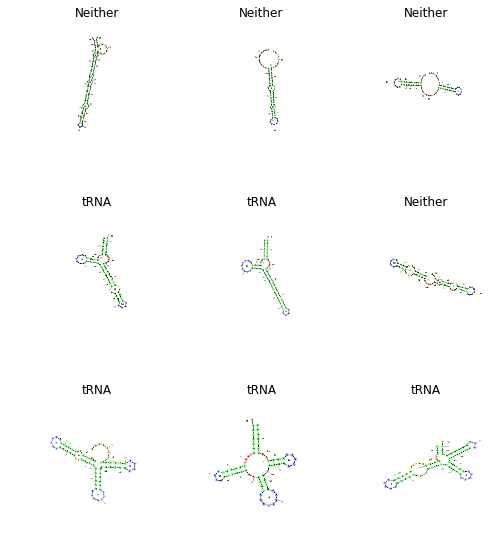

In [6]:
data.show_batch(rows=3, figsize=(7, 8))

In [9]:
#Using a pre trained model resnet (34 layer) we create a model
learn_resnet50=cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/rishikoushal/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 18.7MB/s]


In [10]:
learn_resnet50.freeze()

In [11]:
learn_resnet50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


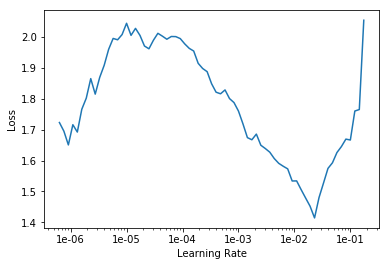

In [69]:
#We could see the curve for learning, which is not really smooth, but conisderable
learn_resnet34.recorder.plot()

In [ ]:
#Fit one cycle on the data, with a specific learning rate range
lr=5e-3
learn_resnet34.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.336469,0.758720,0.710843,02:22
1,1.033346,0.504496,0.855422,02:20


In [ ]:
learn_resnet34.unfreeze()

In [ ]:
lr=5e-3
learn_resnet34.fit_one_cycle(8, slice(lr/10, lr))

In [ ]:
#Look for the confusion matrix and observe the false positives
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
#Helps us to analyze how the model has performed
interp.plot_top_losses(k=9, figsize=(12, 8))

In [18]:
# We can update our dataset by removing some images
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Conclusion and Comments:

Though we obtained a fairly achievable model with ~90% accuracy, we face some problems in our data:

1. We can see that there are a lot of miRNA images, but a very little tRNA images. We can improve a lot, if we have some more tRNA sequences

2. We obtain the data from the gtrandb, who claim that there are some false positives in the sequence data. Thus, this could be a problem for us because when we fold those particular sequences, we won't get the clover shaped structure.

3. A lot of tRNA aren't looking like a clover shaped structure, which might be a problem that stops the model performing better.